## Final Project Submission

Please fill out:
* Student name: Josh Blumer
* Student pace: Self Paced 
* Scheduled project review date/time: Feb. 12th 12:00P.M. 
* Instructor name: Jeff Herman
* Blog post URL:


# Exploratory Data Analysis

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import datetime as dt

## Import and Preview Data File

In [3]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Explore numeric value summary statistics

df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,...,21597.000000,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,...,7.657915,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,...,1.173200,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [4]:
# Explore file metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### The sqft_basement and date columns are object data types which will require conversion to be analyzed and represented visually.

## Begin EDA and Cleaning

In [5]:
# Change sqft_basement datatype to float

df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [6]:
# Change date datatype to datetime object

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [7]:
# Verify change

df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [8]:
# Datetime objects cannot be graphed for visual interpretation so we will derive years old
# by subtracting year_built from date to give us continuous values that can be graphed

df['yrs_old'] = [i.year for i in df['date']] - df['yr_built']
df['yrs_old'].head()

0    59
1    63
2    82
3    49
4    28
Name: yrs_old, dtype: int64

In [9]:
# Drop original date column after extracting age information

df.drop(['date'], axis = 1, inplace = True)

In [10]:
# Check to verify change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yrs_old          21597 non-null int64
dtypes: float64(9), int64(12)
memory usage: 3.5 MB


### Inspect Columns for Missing Values

In [11]:
# Check columns for null values

df.isnull().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
yrs_old             0
dtype: int64

In [12]:
# Impute missing 'view' values with column mode

df['view'] = df['view'].fillna(df['view'].mode()[0])

In [13]:
# Impute missing 'waterfront' values with column mode

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

In [14]:
# Binarize yr_renovated to renovated and drop year_renovated to 

df['renovated'] = [0 if i == 0.0 else 1 for i in df['yr_renovated']]
df.drop(['yr_renovated'], axis = 1, inplace = True)

In [15]:
# Binarize sqft_basement to basement and drop sqft_basement 

df['basement'] = [0 if i == 0.0 else 1 for i in df['sqft_basement']]
df.drop(['sqft_basement'], axis = 1, inplace = True)

In [16]:
# Verify null entries were edited. The remaining missing values with be removed 
# after checking features for multicollinearity

df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yrs_old          0
renovated        0
basement         0
dtype: int64

## Check Features for Multicollinearity

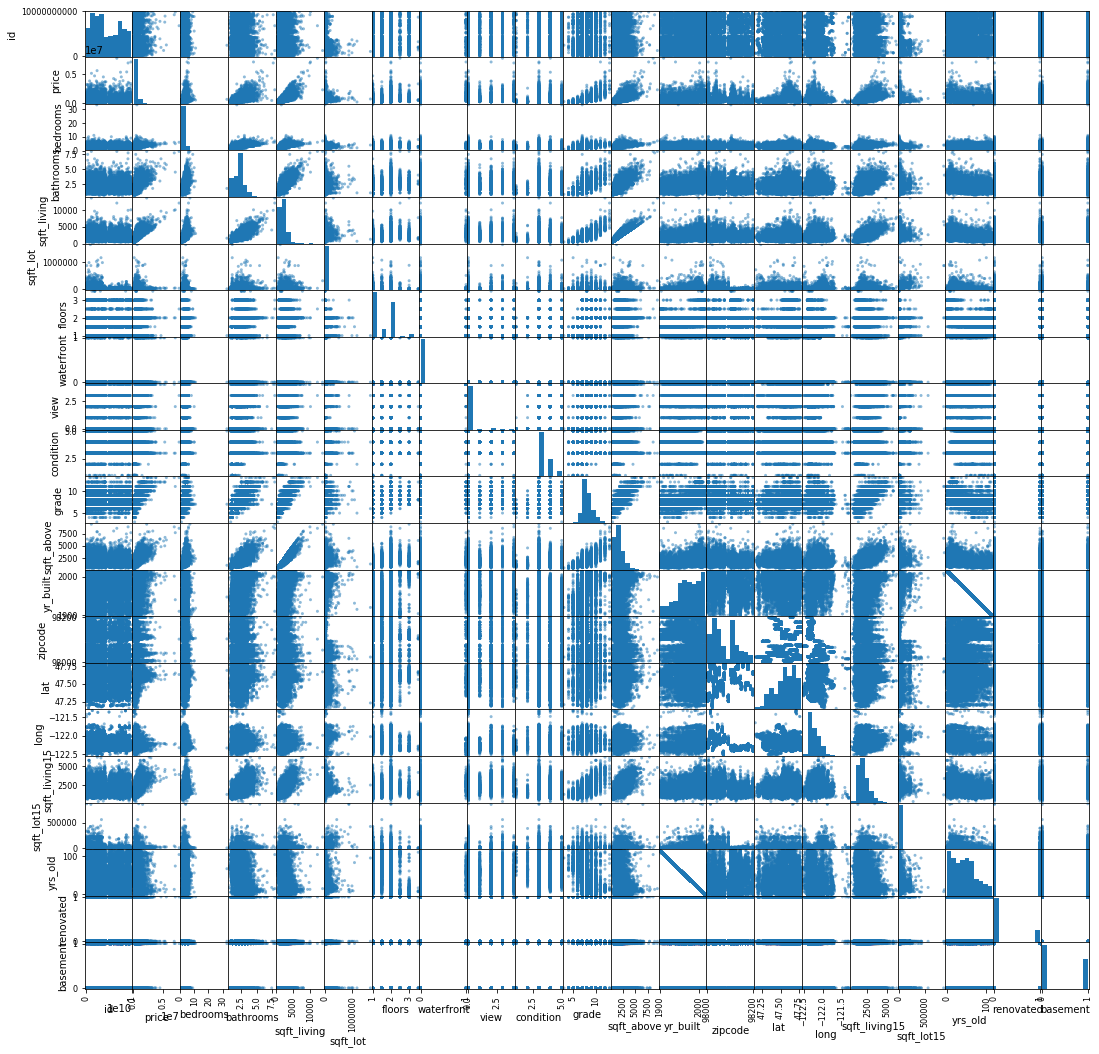

In [17]:
# Examine features for linear relationships

pd.plotting.scatter_matrix(df,figsize  = [18, 18]);
plt.show()

In [18]:
# Examine correlations between independent and dependent variables for feature selection and
# between dependent variables for multicollinearity

df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,renovated,basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.010799,0.021617,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.021458,-0.007227,0.003096
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.605368,0.053953,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.053890,0.050430,0.175472
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.479386,0.155670,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.155817,-0.003605,0.158345
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.686668,0.507173,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.507561,0.008587,0.157747
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.876448,0.318152,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.318592,0.013977,0.198059
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.184139,0.052946,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.052853,-0.006607,-0.033979
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,0.523989,0.489193,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.489514,-0.004810,-0.248292
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.071778,-0.024487,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.024406,0.031776,0.039933
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.166017,-0.054452,0.085059,0.006321,-0.077702,0.278928,0.073083,0.054467,0.044810,0.176662
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,-0.158904,-0.361592,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.360836,-0.027056,0.129050


In [19]:
# Define threshold for multicollinearity correlation as 0.75 to determine which variables
# need to be removed

abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,renovated,basement
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Sqft_living is correlated with sqft_above and sqft_living15. It is the most highly correlated with the target variable, but will be removed due to high correlation with several other variables. We will also remove the id column because it doesnt provide any useful information to the model and yr_built because it is highly correlated with yrs_old.

In [20]:
# Remove columns with correlation greater than 0.75

df.drop(['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built', 'id'], axis = 1, inplace = True)

In [21]:
# Review changes

df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old,renovated,basement
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59,0,0
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63,1,1
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82,1,0
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49,0,1
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28,0,0


## Examine Feature Variables for Outliers

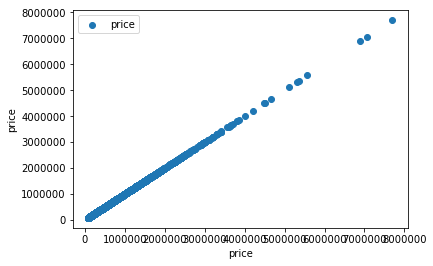

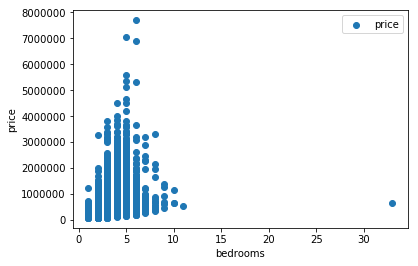

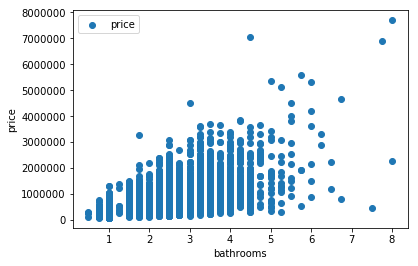

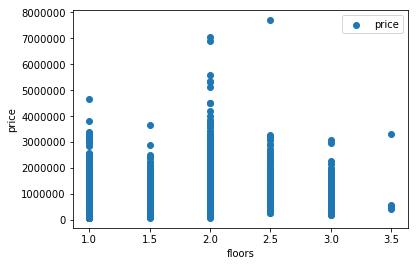

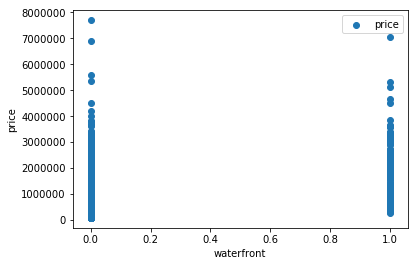

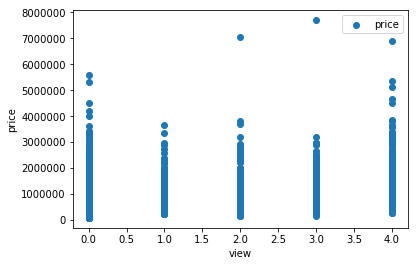

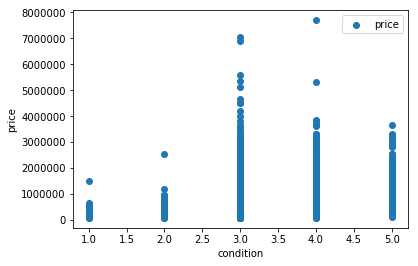

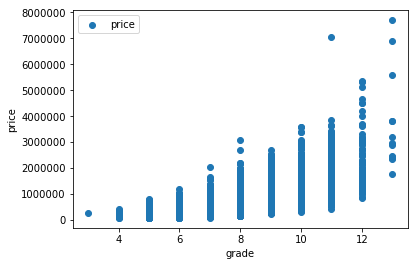

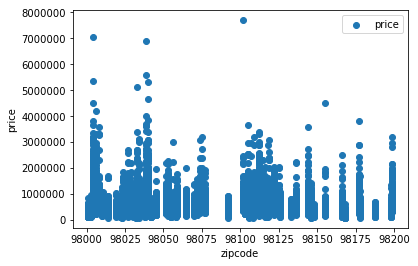

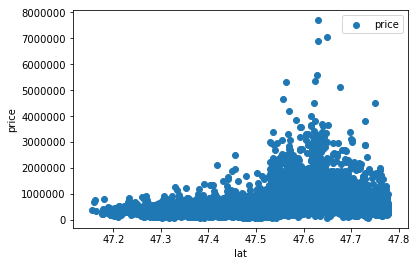

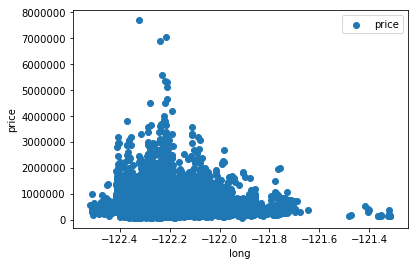

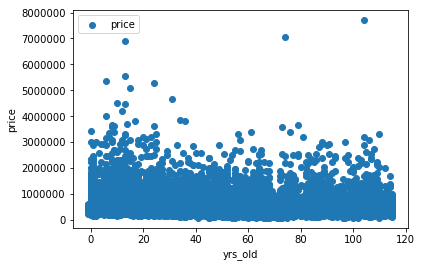

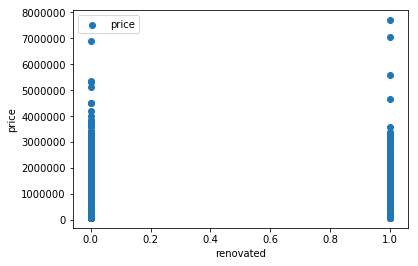

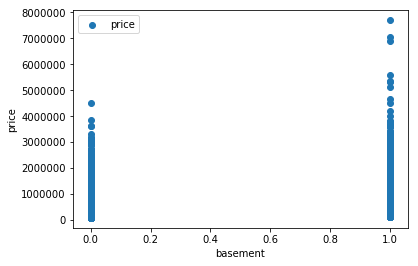

In [22]:
# Examine remaining feature variables relationship with the target variable to meet linearity
# assumptions and inspect observations for visible outliers

for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.scatter(x = df[col], y = df['price'])
    plt.ylabel('price')
    plt.xlabel(col)
    plt.legend()

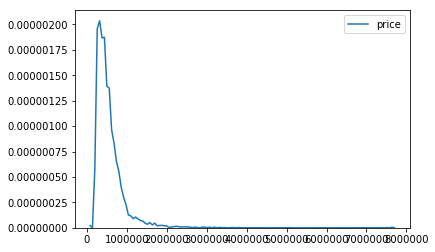

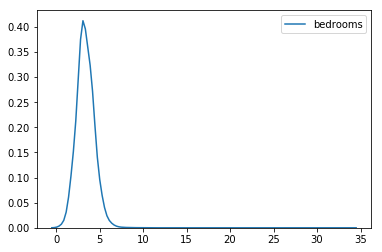

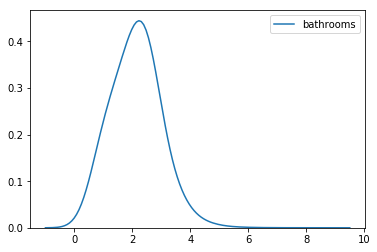

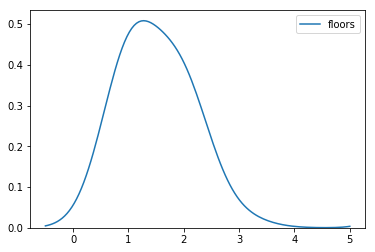

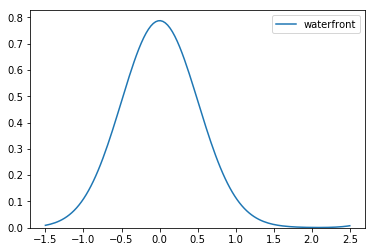

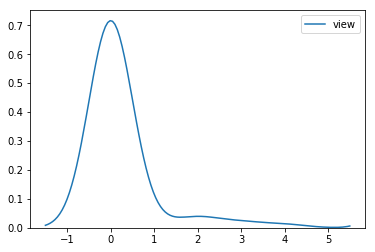

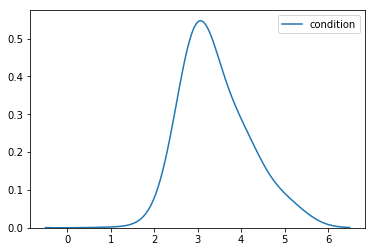

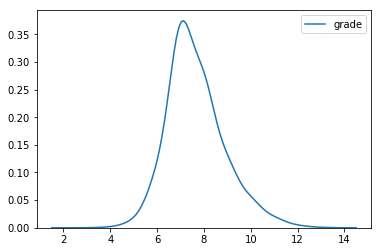

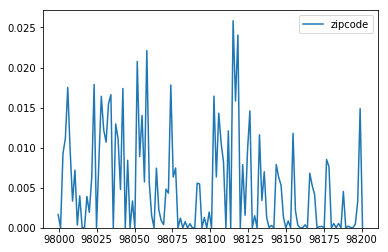

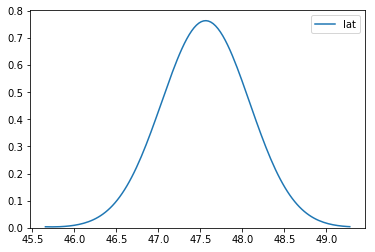

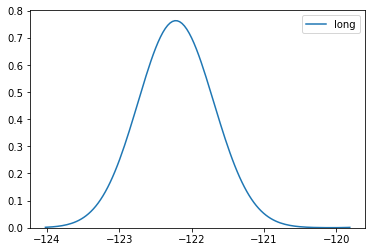

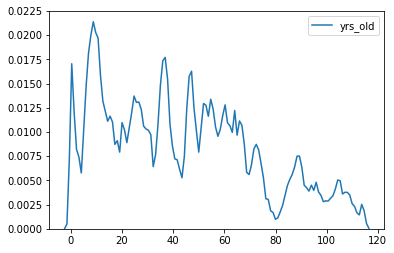

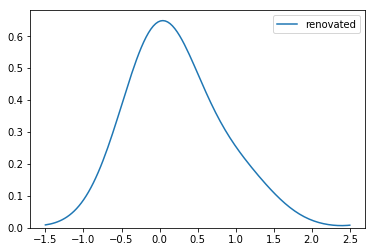

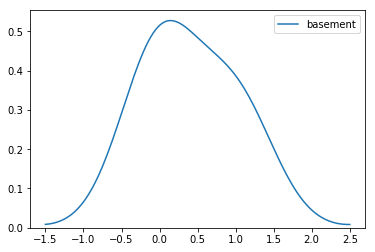

In [23]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.kdeplot(df[col], bw = 0.5)

In [24]:
# Price distribution is heavily skewed so in order to preserve model interpretability and 
# accuracy we will manually filter outliers by filtering the column through value limits

df = df[(df['price'] >= 0) & (df['price'] <= 1000000)]

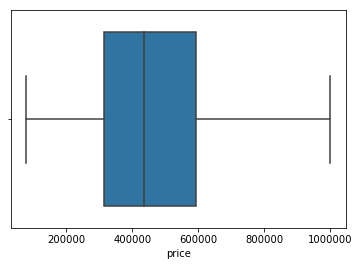

In [25]:
# Review distribution change

sns.boxplot(df['price'])

In [26]:
df.price.shape

(20139,)

In [27]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'yrs_old', 'renovated',
       'basement'],
      dtype='object')

In [28]:
# Separate categorical columns

df_cat = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated', 'basement']]

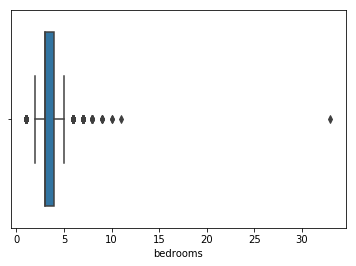

In [29]:
sns.boxplot(df['bedrooms'])

In [30]:
# Remove present outliers by filtering column through value limits

df = df[(df['bedrooms'] >= 0) & (df['bedrooms'] <= 7)]

In [31]:
df.bedrooms.shape

(20122,)

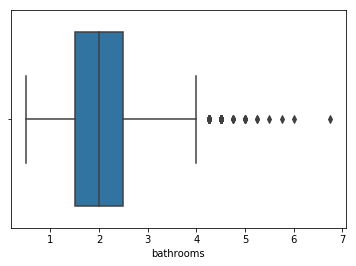

In [32]:
sns.boxplot(df['bathrooms'])

In [33]:
df = df[(df['bathrooms'] >= 0) & (df['bathrooms'] <= 5)]

In [34]:
df.bathrooms.shape

(20116,)

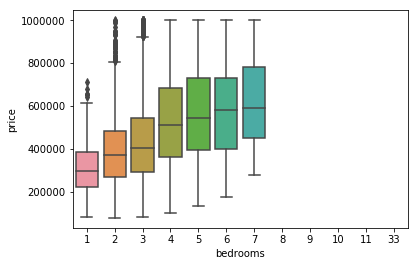

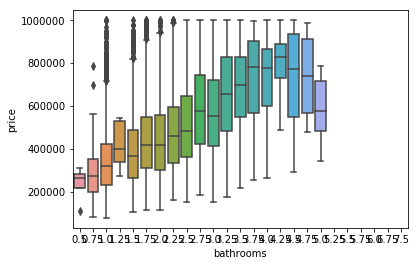

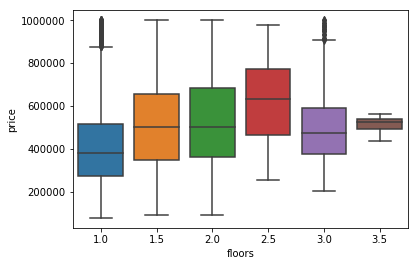

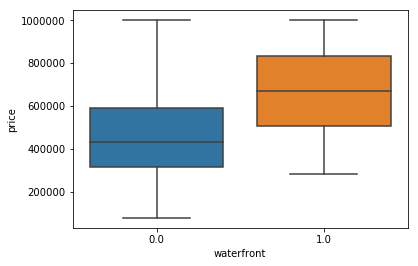

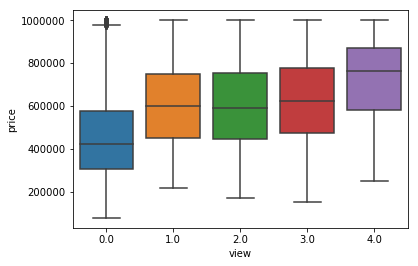

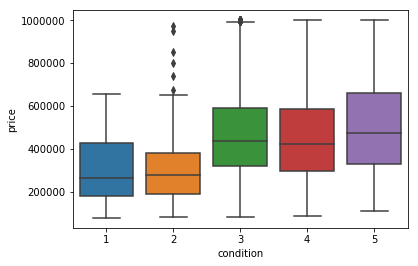

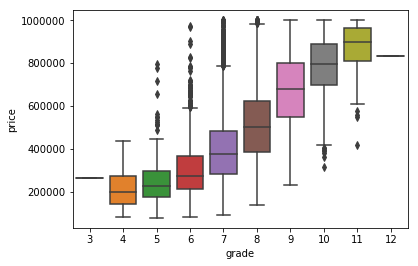

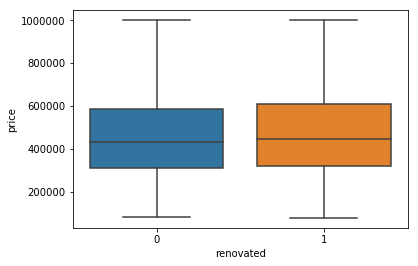

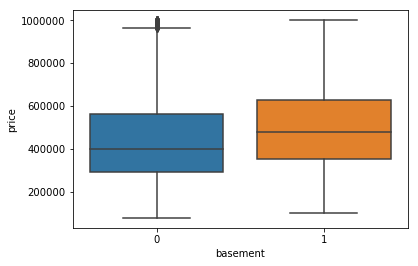

In [35]:
for i, col in enumerate(df_cat):
    plt.figure(i)
    sns.boxplot(x = df_cat[col], y = df['price'])

### Renovated and Basment features exhibit a uniform non linear relatiosnhip with price so they will be removed

In [36]:
df.drop(['renovated', 'basement'], axis = 1, inplace = True)

# Run Baseline Regression

In [37]:
# Baseline regression will be our frame of reference for performance expectations of model
# once adding engineered features

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [40]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3370.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:25:36   Log-Likelihood:            -2.6321e+05
No. Observations:               20116   AIC:                         5.264e+05
Df Residuals:                   20104   BIC:                         5.265e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.437e+06   1.66e+06      2.672      0.008    1.18e+06    7.69e+06
bedrooms    1.124e+04   1120.762     10.030      0.000    9044.821    1.34e+04
bathrooms   5.742e+04   1822.890     31.500      0.000    5.38e+04     6.1e+04
floors      2.602e+04   1953.520     13.320      0.000    2.22e+04    2.98e+04
waterfront  1.465e+05   1.72e+04      8.495      0.000    1.13e+05     1.8e+05
view        3.825e+04   1427.554     26.797      0.000    3.55e+04    4.11e+04
condition   2.186e+04   1390.985     15.712      0.000    1.91e+04    2.46e+04
grade       1.071e+05   1099.594     97.418      0.000    1.05e+05    1.09e+05
zipcode     -231.6197     19.749    -11.728      0.000    -270.330    -192.910
lat         5.283e+05   6230.599     84.788      0.000    5.16e+05     5.4e+05
long        6.175e+04   7291.967      8.468      0.000    4.75e+04     7.6e+04
yrs_old     2162.1226     42.163     51.280      0.000    2079.479    2244.766
==============================================================================
Omnibus:                     1298.930   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1888.615
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                       4.013   Cond. No.                     1.98e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,yrs_old
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,98178,47.5112,-122.257,59
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,63
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,82
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,49
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,28


# Save file alterations for continued processing

In [41]:
# Save file to continue work in another notebook

df.to_csv('kc2_house_data.csv', index = False)